# DBSCAN

In [1]:
import os
import math

import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

## Constants

In [2]:
WORKDIR = "" # os.path.abspath(os.getcwd())
YEARS_AVAILABLE = [2014, 2018, 2021]

## Get the data

__Load into Pandas DataFrame__

In [3]:
file = ''.join([WORKDIR, "../../data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)
dataset

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,riscofogocat,IPS Amazônia,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
0,2014,ACRE,ACRELANDIA,0.9,0.38,0.23,0.00,441,BAIXO,54.64,...,26.77,288.91,12.27,0.00,1.0,29.60,22.32,2.0,13.81,7.35
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.00,327,BAIXO,53.48,...,36.22,201.25,17.35,1.88,2.0,58.91,80.48,3.0,8.17,4.54
2,2014,ACRE,BRASILEIA,1.4,0.36,0.19,0.00,1120,BAIXO,50.05,...,31.08,144.83,20.11,40.00,5.0,300.00,683.19,5.0,9.97,6.59
3,2014,ACRE,BUJARI,0.8,0.36,0.12,0.00,339,BAIXO,54.02,...,34.30,824.47,16.12,0.00,1.0,45.11,32.66,2.0,12.97,9.16
4,2014,ACRE,CAPIXABA,0.8,0.10,0.08,0.00,455,BAIXO,53.15,...,32.05,172.42,26.07,0.00,1.0,0.00,0.00,1.0,11.60,7.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2021,TOCANTINS,TOCANTINOPOLIS,23.2,0.32,0.85,9.03,799,ALTO,53.76,...,25.06,19.09,58.55,16.50,4.0,632.00,433.17,5.0,15.30,11.06
2312,2021,TOCANTINS,TUPIRAMA,39.5,0.94,0.81,7.53,180,ALTO,53.14,...,30.77,9.64,53.85,0.00,1.0,148.61,141.85,4.0,20.10,14.28
2313,2021,TOCANTINS,TUPIRATINS,43.5,0.41,0.89,9.99,690,ALTO,60.37,...,32.14,3.05,28.57,0.00,1.0,159.21,0.00,1.0,19.09,15.72
2314,2021,TOCANTINS,WANDERLANDIA,17.7,0.42,0.80,4.85,622,ALTO,54.31,...,27.59,11.80,81.03,0.00,1.0,0.00,24.26,2.0,15.15,12.15


## Functions

In [4]:
def xyz(features, true_labels, n_cluster=10, n_cluster_val=11):
    print("===========================================================")
    print("Features:\n", features[:5])
    print("True Labels:\n", true_labels[:5])
    print("===========================================================")
    
    
    # Standarization
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    print("Scaled Features:\n", scaled_features[:5])
    print("===========================================================")

    
    # Create KMeans Model
    dbscan = DBSCAN(eps=0.3, min_samples=10)
    _ = dbscan.fit(scaled_features)
    
    core_samples_mask = np.zeros_like(dbscan.labels_,  dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    labels = dbscan.labels_
    
    # Number of clusters in lables, ignoring noises if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_labels, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(true_labels, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(true_labels, labels))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_labels, labels))
    print(
        "Adjusted Mutual Information: %0.3f"
        % metrics.adjusted_mutual_info_score(true_labels, labels)
    )
    # print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scaled_features, labels))
    
#     # show data points clusters
#     y_pred = kmeans.fit_predict(scaled_features)
#     plt.figure(figsize=(10, 10))
#     plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_pred)
#     plt.show()
    
    
#     # Statistics from the initialization
#     print("===========================================================")
#     # The lowest SSE value
#     print("Lowest SSE Value:", kmeans.inertia_)

#     # The number of iterations required to converge
#     print("Iterations Required to Converge:", kmeans.n_iter_)

#     # Final locations of the centroid
#     print("Final locations of the centroid:\n", kmeans.cluster_centers_)
#     print("===========================================================")
    
        
#     # Choosing the Appropriate Number of Clusters
#     kmeans_kwargs = kmeans.get_params()
#     del kmeans_kwargs['n_clusters']
    
#     peform_elbow_method(kmeans_kwargs, n_cluster_val, scaled_features)
#     peform_silhouette_coefficients(kmeans_kwargs, n_cluster_val, scaled_features)
    
    
#     # Ajusted Rand Index
#     print("===========================================================")
#     print("Ajusted Rand Index:\n", perform_ari(true_labels, kmeans.labels_))
#     print("===========================================================")
    
#     return kmeans.labels_
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = scaled_features[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = scaled_features[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.show()

## Model Params

In [5]:
YEAR = 2018

## 1º Study Case - Only the dimensions

Features:
 [[63.41 52.44 41.28]
 [66.74 57.98 39.32]
 [67.3  62.61 23.07]
 [60.64 50.64 50.93]
 [60.12 53.51 40.98]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.02642865 -0.30655314 -0.86812976]
 [ 0.4496538   0.71384642 -1.21216036]
 [ 0.52971572  1.56663521 -4.06445485]
 [-0.4224492  -0.6380909   0.82569435]
 [-0.4967924  -0.10947236 -0.92078751]]
Estimated number of clusters: 5
Estimated number of noise points: 679
Homogeneity: 0.011
Completeness: 0.015
V-measure: 0.013
Adjusted Rand Index: -0.041
Adjusted Mutual Information: 0.002


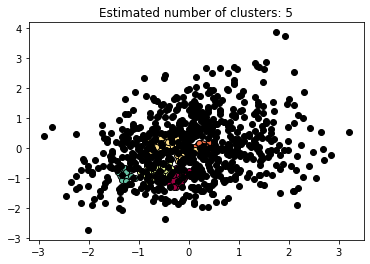

In [6]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Necessidades Humanas Básicas",
    "Fundamentos para o Bem-Estar",
    "Oportunidades"
]].values

xyz(features, true_labels)

## 2º Study Case - "Necessidades Humanas Básicas" Components

Features:
 [[92.37 41.12 86.09 34.06]
 [90.48 54.53 69.15 52.79]
 [91.   56.7  79.41 42.11]
 [92.54 42.45 71.32 36.24]
 [91.36 31.36 82.84 34.91]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[ 0.66145409  0.11709131  0.50301432 -0.65827142]
 [ 0.31156197  0.95687802 -0.73469894  0.28540484]
 [ 0.40782859  1.09277191  0.01494321 -0.25268712]
 [ 0.69292587  0.20038112 -0.5761489  -0.54843617]
 [ 0.4744747  -0.49411811  0.26555458 -0.61544575]]
Estimated number of clusters: 0
Estimated number of noise points: 772
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


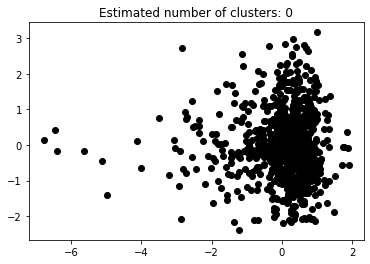

In [7]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Nutrição e cuidados médicos básicos",
    "Água e saneamento",
    "Moradia",
    "Segurança pessoal"
]].values

xyz(features, true_labels)

## 3º Study Case - "Oportunidades" Components

Features:
 [[27.52 64.41 65.09  8.11]
 [19.61 72.32 58.19  7.17]
 [16.56 66.46  0.    9.27]
 [28.57 63.27 98.39 13.5 ]
 [35.82 64.91 56.66  6.51]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.01548769  0.11381718 -0.81503813 -0.38104072]
 [-1.31335907  1.16931911 -1.14023848 -0.49164484]
 [-1.81380252  0.38736699 -3.88276149 -0.24455052]
 [ 0.15679612 -0.0383032   0.75440707  0.25316804]
 [ 1.34637482  0.18053665 -1.21234813 -0.56930306]]
Estimated number of clusters: 0
Estimated number of noise points: 772
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


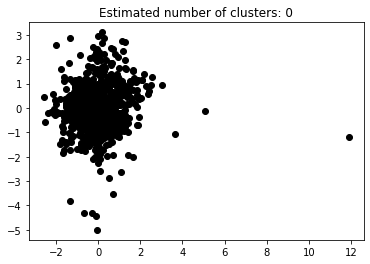

In [8]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Direitos individuais",
    "Liberdade individual e de escolha",
    "Tolerância e inclusão",
    "Acesso à educação superior"
]].values

xyz(features, true_labels)

## 4º Study Case - "Necessidades Humanas Básicas" Indicators

Features:
 [[19.53  0.    6.66  6.66  3.64 31.41 82.3  36.21 51.62 96.03 95.31 92.1
  48.98  6.   28.68  5.   22.12]
 [16.13  0.   13.48 13.48  3.61 35.84 63.95 72.14 37.96 61.22 83.99 82.73
  69.65  6.    9.06  3.    4.49]
 [19.3   1.75  7.61  7.74  4.31 47.26 72.65 61.26 54.71 79.84 89.94 85.72
  33.21  5.   21.73  5.   11.52]
 [ 6.51  4.08  9.89  9.74  3.35 37.48 57.66 42.22 45.   78.5  77.86 76.7
  62.44  6.   39.26  5.    9.84]
 [20.58  0.    0.   25.57  2.18 33.93 12.02 35.94 38.68 87.59 96.17 95.78
  64.2   6.   34.57  5.   17.32]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.05351644 -0.47211043  0.05821303 -0.71040014 -0.92605631 -1.1797335
   1.88589583 -0.67245802 -0.45289009  0.70725927  0.77331944  0.59724773
   0.08643311  0.72737084  0.19397926  0.52384349 -0.01610351]
 [-0.33284187 -0.47211043  0.73873593 -0.286026   -0.95070007 -1.00075918
   1.20016886  0.64100457 -1.09645613 -1.59240518  0.0803696  -0.00251725
   0.6136591

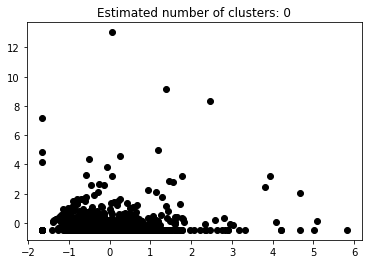

In [9]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Mortalidade infantil até 5 anos",
    "Mortalidade materna",
    "Mortalidade por desnutrição",
    "Mortalidade por doenças infecciosas",
    "Subnutrição",
    
    "Abastecimento de água",
    "Esgotamento sanitário",
    "Índice de atendimento de agua",
    
    "Coleta de lixo",
    "Moradias com iluminação adequada",
    "Moradias com parede adequada",
    "Moradias com piso adequado",
    
    "Assassinatos de jovens",
    "Assassinatos de jovens Taxa",
    "Homicídios",
    "Homicídios Taxa",
    "Mortes por acidente no trânsito",

]].values

xyz(features, true_labels)

### 4º Study Case - "Fundamentos para o Bem-Estar" Indicators

Features:
 [[  2.    26.3   41.3    4.95   8.1   11.89   8.44  55.83   4.04  32.77
   65.55 111.43  58.99   6.66   0.    62.97   3.86  97.57  10.72]
 [  5.9   47.    40.9    4.2   14.3   15.16  17.4   47.77   5.4   13.48
   26.97 121.34  53.93  13.7   84.08   5.54   5.52  89.5   26.03]
 [  1.2   21.1   23.9    6.1    4.6   17.48  19.68  66.89   7.45  34.25
   64.69 137.    49.47   7.08  49.14  35.     4.58  77.38  19.58]
 [  4.7   32.5   41.2    4.15   5.5    8.13   9.35  36.47   7.07   9.74
   68.19  77.93  68.19  19.48  11.25  40.66   2.78 114.26  21.66]
 [  4.1   33.    27.2    4.3   10.8    9.45  10.81  44.16   3.9   34.09
   25.57  25.57  17.05   9.87   3.16  51.98   3.82  98.33  17.89]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-2.76401033e-01  3.00751650e-01  1.89842573e-01  7.66804226e-01
  -4.76735724e-02  2.63346285e-01 -3.28405466e-02  6.64129967e-02
  -5.00497625e-01 -1.00800210e-02  2.34818019e-01 -2.85771253e-01
   5.68952045e-

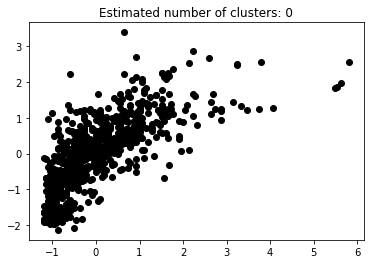

In [10]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Abandono escolar ensino fundamental",
    "Distorção idade-série ensino fundamental",
    "Distorção idade-série ensino médio",
    "Qualidade da educação Ideb ensino fundamental",
    "Reprovação escolar ensino fundamental",
    
    "Densidade internet banda-larga",
    "Densidade telefonia fixa",
    "Densidade telefonia movel",
    "Densidade TV por assinatura",
    
    "Mortalidade por diabetes mellitus",
    "Mortalidade por câncer",
    "Mortalidade por doenças circulatórias",
    "Mortalidade por doenças respiratórias",
    "Mortalidade por suicídios",

    "Áreas Protegidas",
    "Desmatamento acumulado",
    "Desmatamento recente",
    "Emissões CO2",
    "Focos de calor por habitantes"
]].values

xyz(features, true_labels)

### 4º Study Case - "Oportunidades" Indicators

Features:
 [[6.6670e+01 3.4000e+00 1.0000e+00 2.5390e+01 7.1710e+01 1.5230e+01
  0.0000e+00 1.0000e+00 1.4210e+02 1.2276e+02 3.0000e+00 1.3090e+01
  7.2400e+00]
 [5.5560e+01 6.8000e-01 5.0000e+00 2.6610e+01 1.9080e+01 1.6940e+01
  1.8800e+00 2.0000e+00 1.4034e+02 5.3450e+01 3.0000e+00 1.1020e+01
  6.7300e+00]
 [4.5450e+01 8.9000e-01 3.0000e+00 2.8420e+01 3.9710e+01 2.1230e+01
  4.0000e+01 5.0000e+00 3.0000e+02 7.8917e+02 5.0000e+00 1.4330e+01
  8.6400e+00]
 [7.7780e+01 1.6800e+00 3.0000e+00 3.0940e+01 2.1833e+02 1.4330e+01
  0.0000e+00 1.0000e+00 1.4180e+01 3.2660e+01 1.0000e+00 1.9760e+01
  1.3250e+01]
 [1.0000e+02 1.5700e+00 3.0000e+00 2.9220e+01 1.2220e+02 2.0580e+01
  2.5000e+02 5.0000e+00 4.8990e+01 1.9660e+01 2.0000e+00 9.7000e+00
  6.2900e+00]]
True Labels:
 ['ALTO' 'MODERADO' 'MODERADO' 'MODERADO' 'MODERADO']
Scaled Features:
 [[-0.30689441  0.3214695  -0.89855314 -0.08123254 -0.27005649 -1.21358025
  -0.16898977 -0.41241837  1.06410643  0.50451593  1.16873418 -0.27954141
  -0.

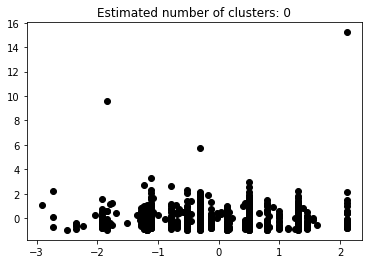

In [11]:
dsyear = dataset[dataset["ano"] == YEAR]
true_labels = dsyear["riscofogocat"].values
features = dsyear[[
    "Diversidade Partidária",
    "Transporte Público",

    "Acesso à cultura, esporte e lazer",
    "Gravidez na infância e adolescência",
    "Trabalho Infantil",
    "Vulnerabilidade familiar",
    
    "Violência contra indígenas",
    "Violência contra indígenas Taxa",
    "Violência contra mulheres",
    "Violência infantil",
    "Violência infantil Taxa",

    "Empregos ensino superior",
    "Mulheres com empregos ensino superior"
]].values

xyz(features, true_labels)